In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read a csv file
salary_df = pd.read_csv('data/Salary_Data.csv')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# drop the null values
salary_df.dropna(inplace = True)

In [4]:
# checking the value counts 
salary_df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [5]:
# creating the variable for reducing the number of job titles
job_title_stats = salary_df['Job Title'].value_counts()
job_title_stats_less_than_50 = job_title_stats[job_title_stats<=50]
job_title_stats_less_than_50.count()

153

In [6]:
# reducing the number of job titles
salary_df['Job Title'] = salary_df['Job Title'].apply(lambda x: 'Others' if x in job_title_stats_less_than_50 else x )

In [7]:
salary_df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)

<AxesSubplot: xlabel='Education Level', ylabel='count'>

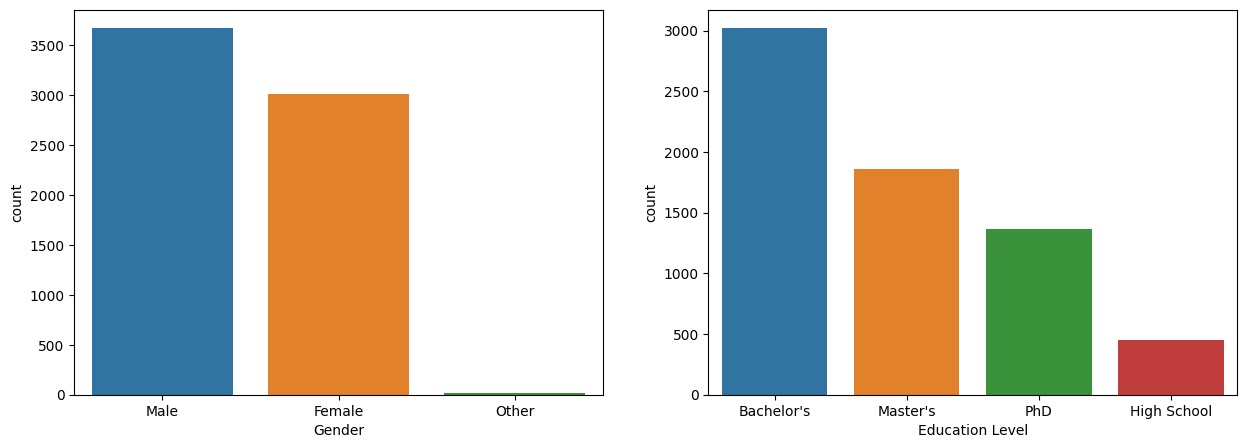

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=salary_df,ax = ax[0])
sns.countplot(x='Education Level',data = salary_df,ax=ax[1])

<AxesSubplot: xlabel='Salary', ylabel='Count'>

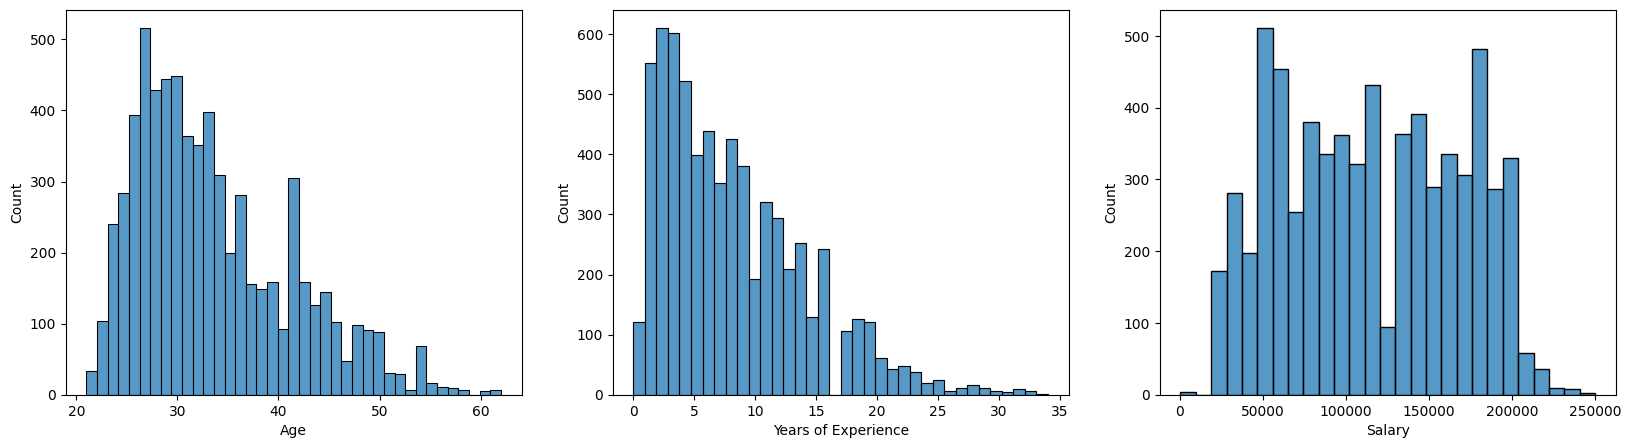

In [9]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(salary_df['Age'],ax=ax[0])
sns.histplot(salary_df['Years of Experience'],ax=ax[1])
sns.histplot(salary_df['Salary'],ax=ax[2])

[Text(0.5, 1.0, 'Top 10 Highest paid jobs')]

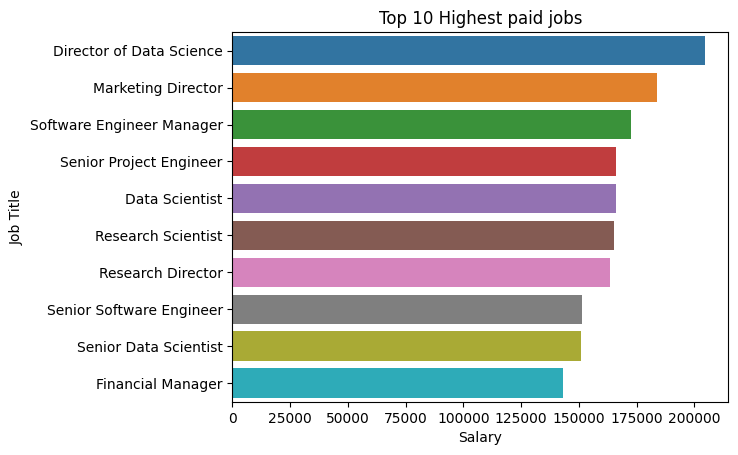

In [10]:
mean_salary_by_job = salary_df.groupby('Job Title')['Salary'].mean().reset_index()
sorted_data = mean_salary_by_job.sort_values(by='Salary',ascending=False)
sns.barplot(x='Salary',y='Job Title',data=sorted_data.head(10)).set(title='Top 10 Highest paid jobs')

[Text(0.5, 1.0, 'Relationship between Education Level and Salary')]

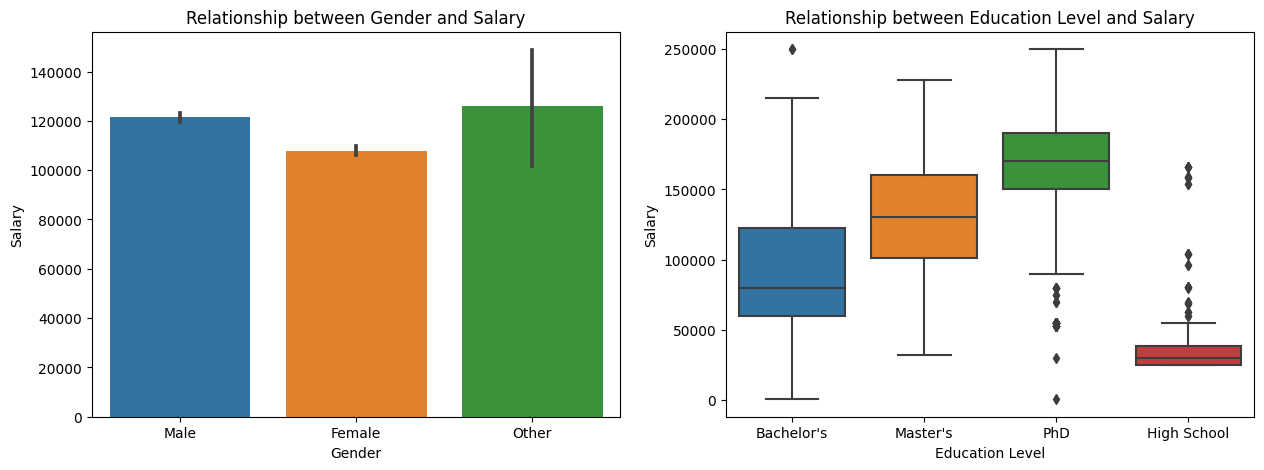

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Gender',y='Salary',data=salary_df,ax=ax[0]).set(title='Relationship between Gender and Salary')
sns.boxplot(x='Education Level',y='Salary',data=salary_df,ax=ax[1]).set(title='Relationship between Education Level and Salary')

[Text(0.5, 1.0, 'Education level vs Salary vs Gender')]

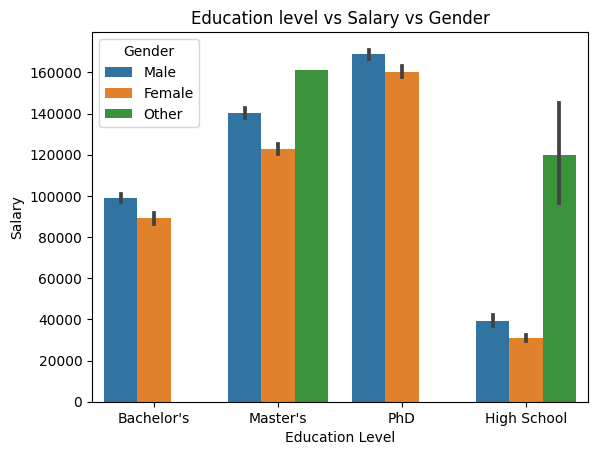

In [12]:
sns.barplot(x='Education Level',y='Salary',data=salary_df,hue='Gender').set(title='Education level vs Salary vs Gender')

[Text(0.5, 1.0, 'Relationship between Age and Salary')]

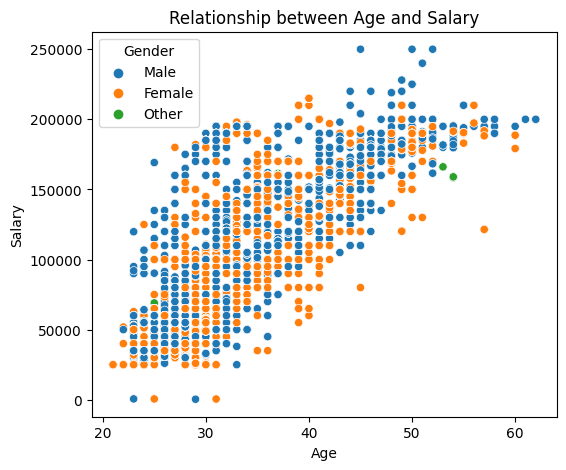

In [13]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Age and Salary')

[Text(0.5, 1.0, 'Relationship between Experience and Salary')]

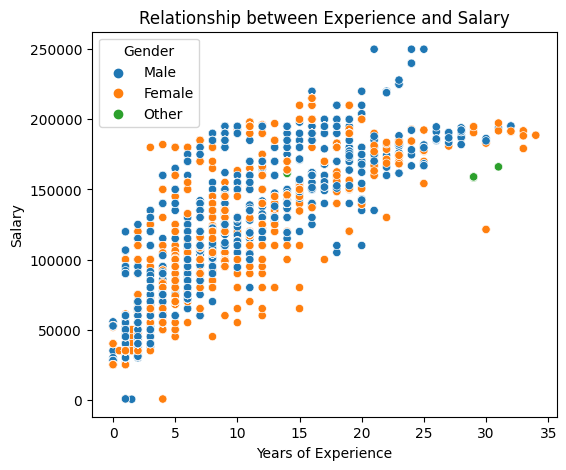

In [14]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Years of Experience',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Experience and Salary')

In [15]:
# detecting the outliers in salary column using IQR method
Q1 = salary_df.Salary.quantile(0.25)
Q3 = salary_df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR